In [1]:
%matplotlib inline

import setGPU
import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize

import glob

from scipy.stats import skew
from scipy.stats import kurtosis

from plots import loadModel, getMetric

setGPU: Setting GPU to: 0


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [87]:
n_samples = 200

#f = h5py.File('/bigdata/shared/HGCAL_data/single_particle/noPU/ntuple_merged_2512_no_pu.h5', 'r')
f = h5py.File('/bigdata/shared/HGCAL_data/single_particle/all_noPU.h5', 'r')
X = np.asarray(f['image'])
#X = X.squeeze()

In [88]:
X.shape

(155145, 16, 16, 55)

In [89]:
proj = np.sum(X, axis=(2, 3))

In [90]:
proj.shape

(155145, 16)

In [91]:
ax_means = np.mean(proj, axis=1)

In [92]:
ax_means.shape

(155145,)

In [93]:
def getMoments(X, axis):
    if (axis == 1):
        proj = np.sum(X, axis=(2, 3))
    elif (axis == 2):
        proj = np.sum(X, axis=(1, 3))
    elif (axis == 3):
        proj = np.sum(X, axis=(1, 2))
        
    ax_means = np.mean(proj, axis=1)
    plt.hist(ax_means, bins=30)
    plt.title('means')
    plt.show()
    ax_means_mean = np.mean(ax_means)
    ax_means_var = np.std(ax_means)
    
    ax_stds = np.std(proj, axis=1)
    plt.hist(ax_stds, bins=30)
    plt.title("stds")
    plt.show()
    ax_stds_mean = np.mean(ax_stds)
    ax_stds_var = np.std(ax_stds)
    
    return ax_means_mean, ax_means_var, ax_stds_mean, ax_stds_var

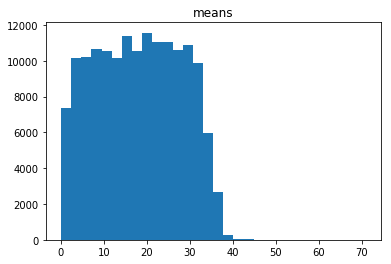

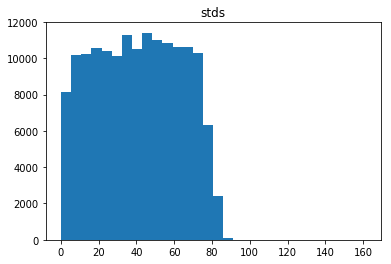

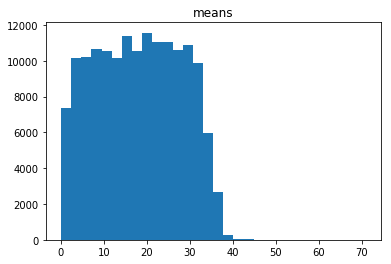

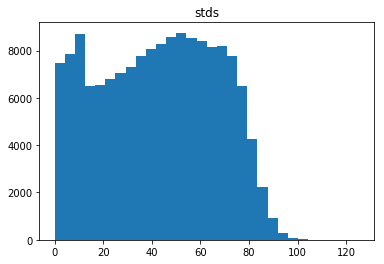

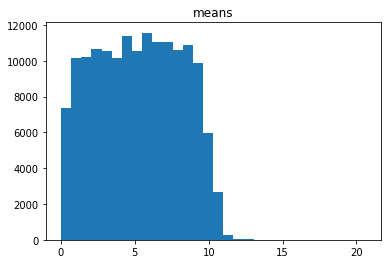

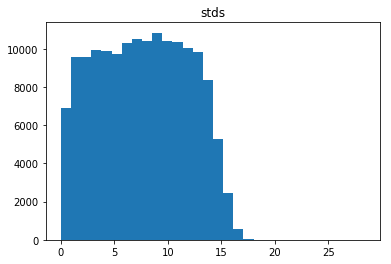

In [94]:
x_means_mean, x_means_var, x_stds_mean, x_stds_var = getMoments(X, axis=1)
y_means_mean, y_means_var, y_stds_mean, y_stds_var = getMoments(X, axis=2)
z_means_mean, z_means_var, z_stds_mean, z_stds_var = getMoments(X, axis=3)

In [95]:
print(x_means_mean, x_means_var, x_stds_mean, x_stds_var)

17.998149280062755 9.908917031746833 40.756853073681526 22.684119187368662


In [96]:
print(y_means_mean, y_means_var, y_stds_mean, y_stds_var)

17.998149280062755 9.908917031746833 42.46215835711499 24.065289911908064


In [97]:
print(z_means_mean, z_means_var, z_stds_mean, z_stds_var)

5.2358252451091625 2.8825940455990784 7.6664971144601335 4.233036581572311


In [98]:
x_means_mean/x_means_var

1.816358863677949

In [99]:
x_stds_mean/x_stds_var

1.796713054495694

In [100]:
y_means_mean/y_means_var

1.816358863677949

In [101]:
y_stds_mean/y_stds_var

1.7644565476896137

In [102]:
z_means_mean/z_means_var

1.8163588636779484

In [103]:
z_stds_mean/z_stds_var

1.811110527094123

In [104]:
def get3rt(x_skews):
    x_skews3rt = []
    for s in x_skews:
        s3rt = s**(1/float(3))
        x_skews3rt.append(s3rt)
    return x_skews3rt

def get4rt(x_kurts):
    x_kurts4rt = []
    for k in x_kurts:
        k4rt = k**(1/float(4))
        x_kurts4rt.append(k4rt)
    return x_kurts4rt

In [105]:
proj = np.sum(X, axis=(2, 3))

x_skews = skew(X, axis=1)

x_skews_mean = np.mean(x_skews)

x_skews_var = np.var(x_skews)

In [106]:
print(x_skews_mean, x_skews_var)

1.2706639154302828 2.2638656506566264


In [107]:
x_skews3rt = get3rt(x_skews)
x_skews3rt_mean = np.mean(x_skews3rt)
x_skews3rt_var = np.var(x_skews3rt)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


In [108]:
print(x_skews3rt_mean, x_skews3rt_var)

nan nan


In [109]:
x_skews_mean/x_skews_var

0.5612806197495559

In [110]:
x_skews3rt_mean/x_skews3rt_var

nan

In [111]:
def getMoments2(X, axis):
    if (axis == 1):
        proj = np.sum(X, axis=(2, 3))
    elif (axis == 2):
        proj = np.sum(X, axis=(1, 3))
    elif (axis == 3):
        proj = np.sum(X, axis=(1, 2))
        
    ax_skews = skew(proj, axis=1)
    ax_skews_mean = np.mean(ax_skews)
    ax_skews_var = np.std(ax_skews)
    
    ax_kurts = kurtosis(proj, axis=1)
    ax_kurts_mean = np.mean(ax_kurts)
    ax_kurts_var = np.std(ax_kurts)
    
    return ax_skews_mean, ax_skews_var, ax_kurts_mean, ax_kurts_var

In [112]:
x_skews_mean, x_skews_var, x_kurts_mean, x_kurts_var = getMoments2(X, axis=1)
y_skews_mean, y_skews_var, y_kurts_mean, y_kurts_var = getMoments2(X, axis=2)
z_skews_mean, z_skews_var, z_kurts_mean, z_kurts_var = getMoments2(X, axis=3)

In [113]:
x_skews_mean/x_skews_var

13.999063552505602

In [114]:
x_kurts_mean/x_kurts_var

4.63800708027107

In [115]:
y_skews_mean/y_skews_var

5.644963666911089

In [116]:
y_kurts_mean/y_kurts_var

2.6154888756895365

In [117]:
z_skews_mean/z_skews_var

6.280195440757361

In [118]:
z_kurts_mean/z_kurts_var

0.524863232338259

In [42]:
def getMoments3(X, axis):
    # Take nth root!
    
    if (axis == 1):
        proj = np.sum(X, axis=(2, 3))
    elif (axis == 2):
        proj = np.sum(X, axis=(1, 3))
    elif (axis == 3):
        proj = np.sum(X, axis=(1, 2))
        
        
    ax_skews = skew(proj, axis=1)
    ax_skews = get3rt(ax_skews) #take third root of skews
    ax_skews_mean = np.mean(ax_skews)
    ax_skews_var = np.var(ax_skews)
    
    ax_kurts = kurtosis(proj, axis=1)
    ax_kurts = get4rt(ax_kurts) #take fourth root of skews
    ax_kurts_mean = np.mean(ax_kurts)
    ax_kurts_var = np.var(ax_kurts)
    
    return ax_skews_mean, ax_skews_var, ax_kurts_mean, ax_kurts_var

In [43]:
x_skews_mean2, x_skews_var2, x_kurts_mean2, x_kurts_var2 = getMoments3(X, axis=1)
y_skews_mean2, y_skews_var2, y_kurts_mean2, y_kurts_var2 = getMoments2(X, axis=2)
z_skews_mean2, z_skews_var2, z_kurts_mean2, z_kurts_var2 = getMoments2(X, axis=3)

In [44]:
x_skews_mean2/x_skews_var2

89515.65795471732

In [45]:
x_kurts_mean2/x_kurts_var2

8202.703208030707

In [46]:
y_skews_mean2/y_skews_var2

11.598999077612646

In [47]:
y_kurts_mean2/y_kurts_var2

1.0066752662168597

In [48]:
z_skews_mean/z_skews_var

21.36416172894844

In [49]:
z_kurts_mean/z_kurts_var

0.4798598660569781